In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/indexProcessed.csv", parse_dates=True)

In [3]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [4]:
df = df.filter(['Index','CloseUSD','Date'])
print(df.shape)

(104224, 3)


In [5]:
df = df.dropna(True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Index     104224 non-null  object 
 1   CloseUSD  104224 non-null  float64
 2   Date      104224 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [6]:
# df.plot(figsize=[12,8])

In [7]:
# df.groupby('Index').describe()

In [8]:
df_grouped = df.groupby('Index')
df.groupby('Index').describe().transpose()

Index             000001.SS    399001.SZ         GDAXI        GSPTSE  \
CloseUSD count  5791.000000  5760.000000   8438.000000  10526.000000   
         mean    381.291062  1275.812961   7216.112995   6714.755033   
         std     146.424239   633.914906   4452.541882   4091.494743   
         min     161.839844   405.555195   1141.920000   1117.512020   
         25%     254.042881   628.352803   3066.610288   2869.019571   
         50%     362.892812  1342.891250   6589.354033   5898.436540   
         75%     483.772480  1726.777539   9663.592448  10495.080493   
         max     974.729141  3124.984062  18934.376173  16477.325353   

Index                   HSI          IXIC      J203.JO         N100  \
CloseUSD count  8492.000000  12690.000000  2346.000000  5474.000000   
         mean   1976.078732   1984.906795  3563.766210  1003.027537   
         std    1056.477228   2491.745830   532.357848   221.250861   
         min     246.337003     54.869999  2302.121445   512.339015   
         25%    1203.639150    249.300003  3352.339717   810.351417   
         50%    1846.016885   1091.444946  3652.466016  1011.166515   
         75%    2920.320318   2549.307434  3915.997969  1201.080841   
         max    4310.035742  14138.780270  4814.254375  1541.616394   

Index                   N225         NSEI           NYA          SSMI  \
CloseUSD count  13874.000000  3346.000000  13947.000000   7671.000000   
         mean     128.491552    76.600472   4452.174711   7114.803716   
         std       80.264767    28.341118   4075.459366   2709.188152   
         min       10.204900    25.242000    347.769989   1429.235973   
         25%       60.809774    53.260376    654.940002   5641.686108   
         50%      117.859150    74.853250   2631.800049   7380.501109   
         75%      185.504702   100.744248   7337.935059   9191.049858   
         max      389.158711   155.827998  16590.429690  12683.026933   

Index                  TWII  
CloseUSD count  5869.000000  
         mean    321.154646  
         std      88.743767  
         min     137.850400  
         25%     257.294395  
         50%     316.831992  
         75%     366.426406  
         max     703.836016

In [9]:
indexes = df['Index'].unique()

def findMinMaxDates():
    minDates = []
    maxDates = []
    for index in indexes:
        df_index = df_grouped.get_group(index)
        minDates.append(df_index.min()['Date'])
        maxDates.append(df_index.max()['Date'])
    return {min:max(minDates), max:min(maxDates)}  

MinMaxDate = findMinMaxDates()
date_range = pd.date_range(start=MinMaxDate.get(min),end= MinMaxDate.get(max))
print(date_range)

DatetimeIndex(['2012-02-08', '2012-02-09', '2012-02-10', '2012-02-11',
               '2012-02-12', '2012-02-13', '2012-02-14', '2012-02-15',
               '2012-02-16', '2012-02-17',
               ...
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28'],
              dtype='datetime64[ns]', length=3398, freq='D')


In [10]:
newDf = pd.DataFrame({'Date': date_range})
newDf = newDf.set_index('Date')
newDf.index = newDf.index.astype(object)
newDf

""
Date
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
...
2021-05-24
2021-05-25
2021-05-26


In [11]:
def groupDfByIndex():
    df_to_join = []
    for index in indexes:
        df = df_grouped.get_group(index)
        df = df.set_index('Date')
        df.index = pd.to_datetime(df.index)
        df = df.loc[MinMaxDate.get(min): MinMaxDate.get(max)]
        df.drop('Index', inplace=True, axis=1)
        df = df.rename(columns={'CloseUSD': index})
        df_to_join.append(df) 
    
    return df_to_join

df_to_join = groupDfByIndex()

In [12]:
df_to_join

[                    HSI
 Date                   
 2012-02-08  2732.399922
 2012-02-09  2731.301270
 2012-02-10  2701.901719
 2012-02-13  2715.362051
 2012-02-14  2719.317910
 ...                 ...
 2021-05-24  3693.593770
 2021-05-25  3758.411719
 2021-05-26  3791.581270
 2021-05-27  3784.715899
 2021-05-28  3786.173321
 
 [2289 rows x 1 columns],
                      NYA
 Date                    
 2012-02-08   8082.979980
 2012-02-09   8081.250000
 2012-02-10   7992.049805
 2012-02-13   8056.229980
 2012-02-14   8029.609863
 ...                  ...
 2021-05-24  16464.689450
 2021-05-25  16390.189450
 2021-05-26  16451.960940
 2021-05-27  16531.949220
 2021-05-28  16555.660160
 
 [2342 rows x 1 columns],
                     IXIC
 Date                    
 2012-02-08   2915.860107
 2012-02-09   2927.229980
 2012-02-10   2903.879883
 2012-02-13   2931.389893
 2012-02-14   2931.830078
 ...                  ...
 2021-05-24  13661.169920
 2021-05-25  13657.169920
 2021-05-26  13738.00

In [13]:
newDf = newDf.join(df_to_join)

In [14]:
newDf = newDf.fillna(method='ffill')

,HSI,NYA,IXIC,000001.SS,N225,N100,399001.SZ,GSPTSE,NSEI,GDAXI,SSMI,TWII,J203.JO
Date,,,,,,,,,,,,,
2012-02-08,2732.399922,8082.979980,2915.860107,375.604805,90.155898,771.930576,1529.212812,10392.430000,53.681499,8233.486915,6833.004448,314.796406,2395.871133
2012-02-09,2731.301270,8081.250000,2927.229980,375.934258,90.022402,773.296971,1529.716875,10373.257324,54.123501,8282.335762,6848.289170,316.431191,2398.769844
2012-02-10,2701.901719,7992.049805,2903.879883,376.316953,89.471699,763.598029,1534.552031,10283.202324,53.816001,8165.411152,6805.032773,314.490801,2372.480469
2012-02-11,2701.901719,7992.049805,2903.879883,376.316953,89.471699,763.598029,1534.552031,10283.202324,53.816001,8165.411152,6805.032773,314.490801,2372.480469
2012-02-12,2701.901719,7992.049805,2903.879883,376.316953,89.471699,763.598029,1534.552031,10283.202324,53.816001,8165.411152,6805.032773,314.490801,2372.480469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,3693.593770,16464.689450,13661.169920,559.564805,283.646094,1517.558029,2321.057656,16207.659647,151.977002,18833.761919,12460.393889,653.531602,4623.844532
2021-05-25,3758.411719,16390.189450,13657.169920,573.014414,285.539805,1517.362788,2375.432032,16238.202676,152.084502,18867.409605,12460.393889,663.826797,4625.367578
2021-05-26,3791.581270,16451.960940,13738.000000,574.937617,286.421895,1516.972454,2366.988750,16388.765000,153.014502,18849.878071,12597.101655,665.747578,4627.575859


<AxesSubplot:xlabel='Date'>

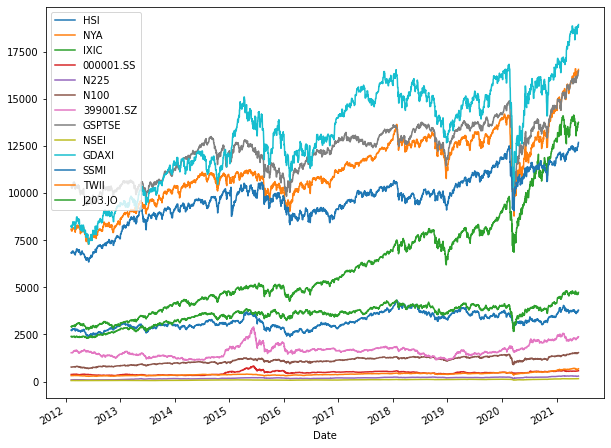

In [15]:
newDf.plot(figsize=[10,8])

In [18]:
newDf.to_csv('stock_exchange_customized.csv')